In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib nbagg

In [23]:
filep = "experiments/DRAGAN_os=1_pw=3_pboth=0_psym=1_niter=100_at_2017-08-17_19:09:45.207164"
filep = "experiments/DRAGAN_os=1_pw=10_pboth=0_psym=1_niter=2000_at_2017-08-22_10:43:10.787853"
filep = "experiments/DRAGAN_os=0_pw=1_pboth=1_psym=1_niter=2000_at_2017-08-31_07:38:33.909240"
filep = "experiments/WGAN-GP_os=0_pw=1_niter=2000_at_2017-08-30_21:46:43.596199"
filep = "experiments/DRAGAN_os=0_pw=10_pboth=0_psym=0_niter=500_at_2017-09-16_12:23:12.749903"


In [24]:
df = pd.DataFrame.from_csv(filep, index_col=[0, 1])

In [25]:
def get_stats(series):
    means = series.mean(level=[0])
    stds = series.std(level=[0])
    mins = series.min(level=[0])
    maxs = series.max(level=[0])
    q25 = series.groupby(level=[0]).quantile(0.25)
    q50 = series.groupby(level=[0]).quantile(0.5)
    q75 = series.groupby(level=[0]).quantile(0.75)
    
    return means, stds, (q25, q50, q75), (mins, maxs)

In [26]:
means, stds, (q25, q50, q75), (mins, maxs) = get_stats(df["valid_EMD"]) 

In [7]:
means, stds, (q25, q50, q75), (mins, maxs) = get_stats(df["errD"])

In [17]:
means, stds, (q25, q50, q75), (mins, maxs) = get_stats(df["scoreD_real"] - df["scoreD_fake"])

In [113]:
df['errD'][:, 2]

iter
1      -1.569544
2      -1.465371
3      -1.227054
4      -1.114991
5      -0.889568
6      -0.839936
7      -0.620395
8      -0.496356
9      -0.425263
10     -0.332750
11     -0.294231
12     -0.284250
13     -0.325447
14     -0.245732
15     -0.310545
16     -0.261052
17     -0.212139
18     -0.211132
19     -0.277130
20     -0.242700
21     -0.260255
22     -0.221702
23     -0.259247
24     -0.226382
25     -0.241464
26     -0.235074
27     -0.260099
28     -0.225246
29     -0.243666
30     -0.236249
          ...   
1971   -0.044474
1972   -0.037367
1973   -0.053253
1974   -0.045956
1975   -0.049442
1976   -0.052040
1977   -0.055167
1978   -0.045612
1979   -0.050429
1980   -0.061762
1981   -0.053264
1982   -0.039438
1983   -0.026387
1984   -0.054476
1985   -0.036503
1986   -0.046890
1987   -0.043767
1988   -0.043524
1989   -0.039063
1990   -0.042146
1991   -0.047515
1992   -0.051155
1993   -0.044238
1994   -0.049528
1995   -0.046687
1996   -0.035339
1997   -0.040612
1998   -0

In [114]:
df['errD']

iter  run
1     1     -1.554896
      2     -1.569544
      3     -1.506623
      4     -1.524148
      5     -1.532916
      6     -1.559023
      7     -1.550487
      8     -1.545679
      9     -1.547154
      10    -1.570310
      11    -1.560342
      12    -1.532065
      13    -1.564823
      14    -1.524820
      15    -1.571577
      16    -1.571923
      17    -1.542837
      18    -1.569225
      19    -1.580130
      20    -1.553368
2     1     -1.432011
      2     -1.465371
      3     -1.420869
      4     -1.375314
      5     -1.371955
      6     -1.458292
      7     -1.435797
      8     -1.407764
      9     -1.430587
      10    -1.466990
               ...   
1999  11    -0.046663
      12    -0.048534
      13    -0.030049
      14    -0.037653
      15    -0.051001
      16    -0.037830
      17    -0.021609
      18    -0.039341
      19    -0.022897
      20    -0.048129
2000  1     -0.031077
      2     -0.040091
      3     -0.058294
      4     -0.062992


In [27]:
def plot_quantiles(q1, q2, q3, minmax=None, rng=None, yrange=None):
    if rng is not None:
        start, end = rng
        q1 = q1[start:end]
        q2 = q2[start:end]
        q3 = q3[start:end]
        if minmax is not None:
            minmax = (minmax[0][start:end], minmax[1][start:end])
    
    plt.figure(figsize=(9, 6))
    axes = plt.gca()
    if yrange is not None:
        axes.set_ylim(yrange)
    plt.plot(q2.index, q2, "k")
    plt.fill_between(q2.index, q1, q3, color="b", alpha=0.2)
    if minmax is not None:
        mins, maxs = minmax
        plt.plot(mins.index, mins, "g,")
        plt.plot(maxs.index, maxs, "g,")
        
def plot_singleRuns(x, yrange=None):
    uniqueruns = x.index.get_level_values('run').unique()
    cmapp = plt.cm.get_cmap("hsv", len(uniqueruns))
    plt.figure(figsize=(9, 6))
    axes = plt.gca()
    if yrange is not None:
        axes.set_ylim(yrange)
    for i, run in enumerate(uniqueruns):
        plt.plot(x[:, run].index, x[:, run], color=cmapp(i))
  

def plot_mean_std(means, stds, minmax=None, rng=None, yrange=None):
    if rng is not None:
        start, end = rng
        means = means[start:end]
        stds = stds[start:end]
        if minmax is not None:
            minmax = (minmax[0][start:end], minmax[1][start:end])
    plt.figure(figsize=(9, 6))
    axes = plt.gca()
    if yrange is not None:
        axes.set_ylim(yrange)
    plt.plot(means.index, means, "k")
    plt.fill_between(stds.index, means-2*stds, means+2*stds, color='b', alpha=0.2)
    if minmax is not None:
        mins, maxs = minmax
        plt.plot(mins.index, mins, "g,")
        plt.plot(maxs.index, maxs, "g,")

<IPython.core.display.Javascript object>


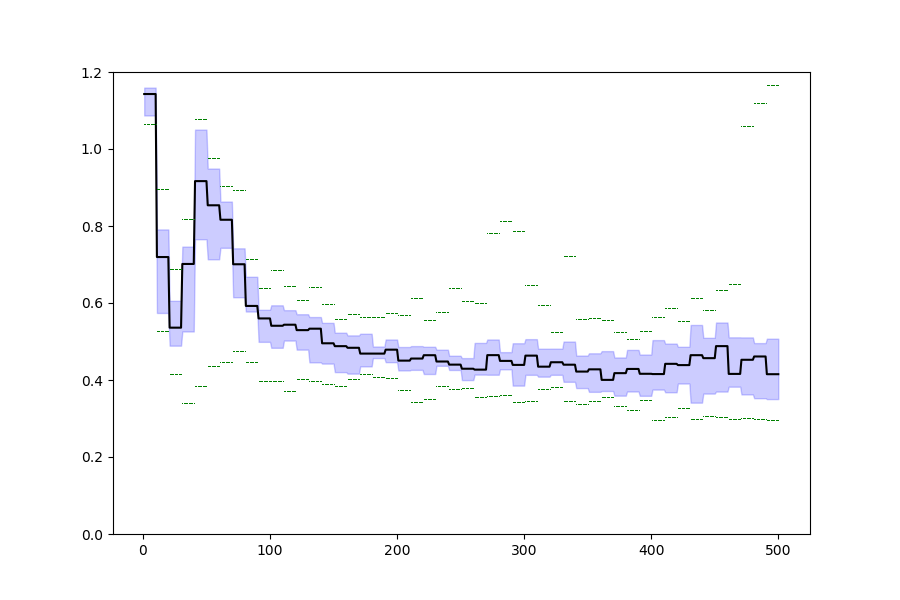

In [30]:
plot_quantiles(q25, q50, q75, minmax=(mins, maxs), rng=(0,2000), yrange=(0,1.2))



<IPython.core.display.Javascript object>


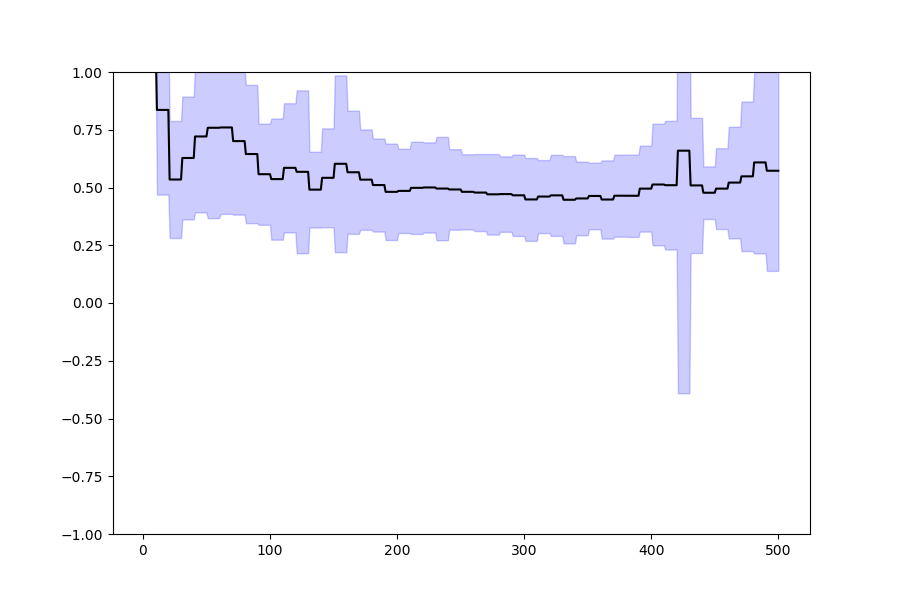

In [8]:
plot_mean_std(means, stds, rng=(0,2000), yrange=(-1,1))

In [ ]:
plot_singleRuns(df[""] - df["scoreD_fake"], yrange=(-1,1))

<IPython.core.display.Javascript object>


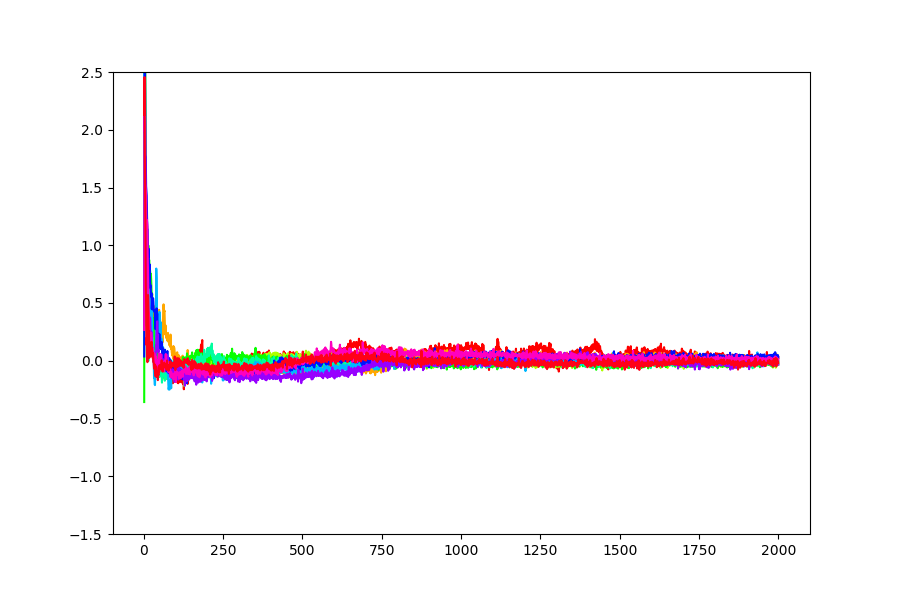

In [21]:
plot_singleRuns(df["scoreD_real"] - df["scoreD_fake"],yrange=(-1.5,2.5))

<IPython.core.display.Javascript object>


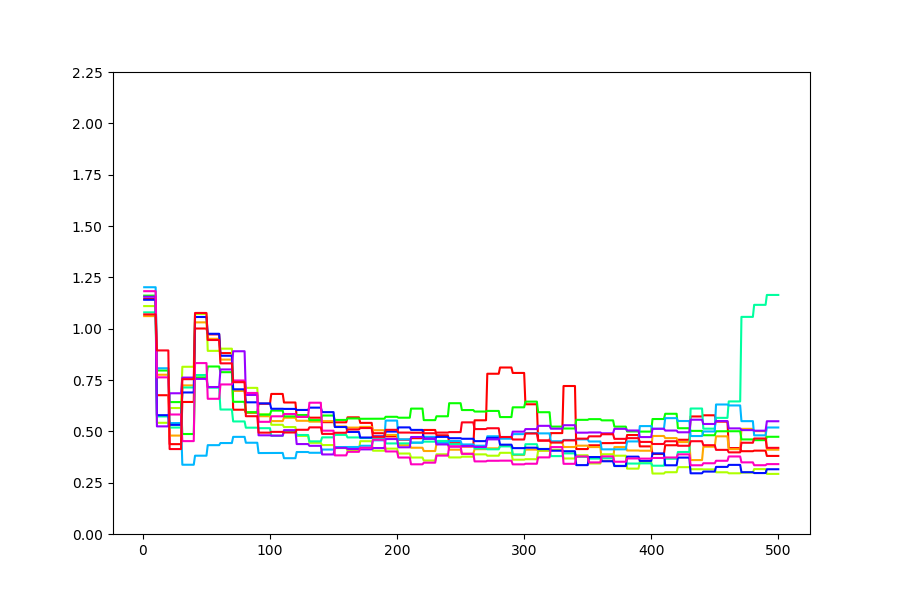

In [31]:
plot_singleRuns(df["valid_EMD"],  yrange=(-0,2.25))